# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

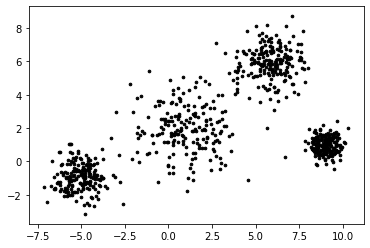

In [64]:
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed =5
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()

## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

## Creating functions

First I will create two functions, one for creating the centres and the other for creating the model

In [72]:
def createCentres(k,c,data,seed=6):
    np.random.seed = seed
    centres = np.random.randn(k,c)*np.std(data)+np.mean(data)
    return centres
    
def createModel(k,seed,centres,data,iterations):
    model = KMeans(n_clusters=k,random_state=seed,max_iter=iterations,init=centres,n_init=1).fit(data)
    return model

array([[ 0.77122541, -5.05344509],
       [ 3.91391825,  2.63006202],
       [ 3.97011698,  4.07719862],
       [ 9.78723622, -0.90029969]])

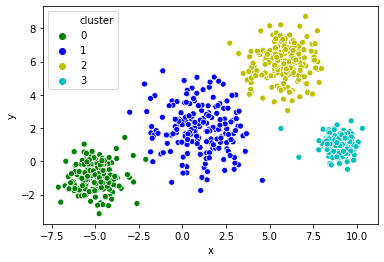

In [81]:
centres = createCentres(k,c,data)
model = createModel(k,6,centres,data,10)
colours = ['g','b','y','c']
x,y = data[:,0],data[:,1]
df = pd.DataFrame({'x':x,'y':y,'cluster':model.labels_})
sns.scatterplot(x='x',y='y',hue='cluster',data=df,palette=colours)
centres

## 2. Visualise the clustering results in each iteration

You need to implement the process of k-means clustering.  Implement each iteration as a seperate cell, assigning each data point to the closest centre, then updating the cluster centres based on the data, then plot the new clusters.

Replace this text with your explaination of the algorithm.  The resulting notebook should provide a good explanation and demonstration of the K-means algorithm.

## First Iteration
For the first iteration, we specified that there are 4 different clusters. We initialise the centres to be the same random 4 centres that we specified above.
The way that KMeans works is that the clusters are classified by closest the distance (Euclidean) from each centroid.
Each data point is associated with their closest centroid in which I have coloured into clusters using the `model.labels_` method as the `hue`.

Centroid 1 Pos: [-4.83241117 -0.92085162]
Centroid 2 Pos: [1.08981752 1.71004373]
Centroid 3 Pos: [5.1875298  5.72348616]
Centroid 4 Pos: [9.00247812 0.99212523]


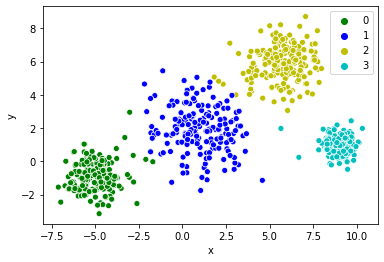

In [82]:
model_1 = createModel(k,6,centres,data,1)
sns.scatterplot(x='x',y='y',hue=model_1.labels_,data=df,palette=colours)

for i in range(4):
    print('Centroid {} Pos:'.format(i+1), model_1.cluster_centers_[i])

## Second Iteration

The next iteration will recalculate the position of the centroids to better fit the amount of clusters specified.
The new value or position of a centroid is the sum of all the points belonging to that centroid divided by the number of points in the group (otherwise known as the mean), this gives us the 'average point' of the cluster in which we assign as our new centroid, and the data points are now associated with their new closest centroids. 

Centroid 1 Pos: [-4.99618901 -0.88920885]
Centroid 2 Pos: [0.96904445 1.91838143]
Centroid 3 Pos: [5.76174352 5.90652557]
Centroid 4 Pos: [8.98589559 0.99700947]


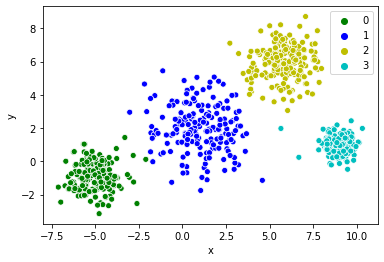

In [83]:
model_2 = createModel(k,6,centres,data,2)
sns.scatterplot(x='x',y='y',hue=model_2.labels_,data=df,palette=colours)

for i in range(4):
    print('Centroid {} Pos:'.format(i+1), model_2.cluster_centers_[i])

As you can see from the `cluster_centers_` method call, we can see that the centroids are changing after each iteration.

Centroid 1 Pos: [-5.02196356 -0.91230535]
Centroid 2 Pos: [0.96241629 1.97101337]
Centroid 3 Pos: [5.82882187 5.93141164]
Centroid 4 Pos: [8.98589559 0.99700947]


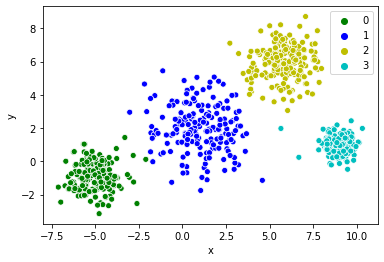

In [84]:
model_3 = createModel(k,6,centres,data,3)
sns.scatterplot(x='x',y='y',hue=model_3.labels_,data=df,palette=colours)
for i in range(4):
    print('Centroid {} Pos:'.format(i+1), model_3.cluster_centers_[i])

Centroid 1 Pos: [-5.02196356 -0.91230535]
Centroid 2 Pos: [0.96241629 1.97101337]
Centroid 3 Pos: [5.82882187 5.93141164]
Centroid 4 Pos: [8.98589559 0.99700947]


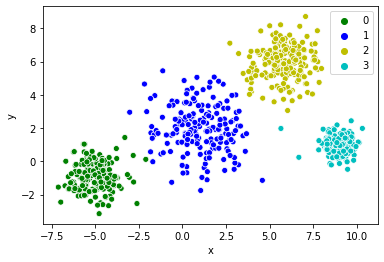

In [85]:
model_4 = createModel(k,6,centres,data,4)
model_4 = KMeans(n_clusters=k,random_state=6,max_iter=4,init=centres,n_init=1).fit(data)
sns.scatterplot(x='x',y='y',hue=model_4.labels_,data=df,palette=colours)

for i in range(4):
    print('Centroid {} Pos:'.format(i+1), model_4.cluster_centers_[i])

Between the 4th and 5th iterations, we see that the centroids have not changed. Therefore no further calculations are required and each centroid has centered itself in the middle of their respective clusters.

Centroid 1 Pos: [-5.02196356 -0.91230535]
Centroid 2 Pos: [0.96241629 1.97101337]
Centroid 3 Pos: [5.82882187 5.93141164]
Centroid 4 Pos: [8.98589559 0.99700947]


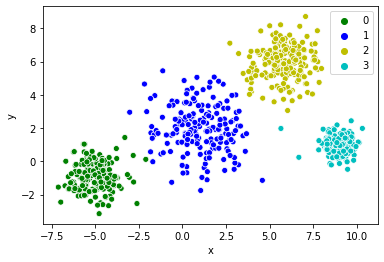

In [86]:
model_5 = createModel(k,6,centres,data,5)
sns.scatterplot(x='x',y='y',hue=model_5.labels_,data=df,palette=colours)

for i in range(4):
    print('Centroid {} Pos:'.format(i+1), model_5.cluster_centers_[i])

Centroid 1 Pos: [-5.02196356 -0.91230535]
Centroid 2 Pos: [0.96241629 1.97101337]
Centroid 3 Pos: [5.82882187 5.93141164]
Centroid 4 Pos: [8.98589559 0.99700947]


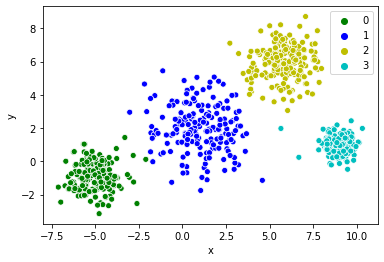

In [87]:
model_6 = createModel(k,6,centres,data,6)
sns.scatterplot(x='x',y='y',hue=model_6.labels_,data=df,palette=colours)
for i in range(4):
    print('Centroid {} Pos:'.format(i+1), model_6.cluster_centers_[i])